In [10]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import jax

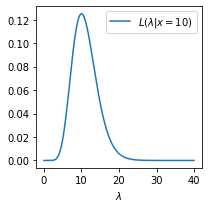

In [30]:
parvals = np.linspace(0,40,1001)
lhood = sps.poisson.pmf(10,parvals)
plt.plot(parvals,lhood, label = r'$L(\lambda|x = 10)$')
plt.legend()
plt.xlabel(r'$\lambda$')
plt.gcf().set_size_inches(3,3)
plt.gcf().set_tight_layout(True)
plt.gcf().savefig('poisson_lhood.png', dpi = 600)

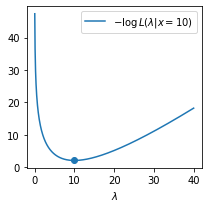

In [43]:
parvals = np.linspace(0,40,1001)
nll = -sps.poisson.logpmf(10,parvals)
plt.plot(parvals,nll, label = r'$-\mathrm{log}\,L(\lambda|x = 10)$')
plt.scatter(10,-sps.poisson.logpmf(10,10))
plt.legend()
plt.xlabel(r'$\lambda$')
plt.gcf().set_size_inches(3,3)
plt.gcf().set_tight_layout(True)
plt.gcf().savefig('poisson_nll_with_minimum.png', dpi = 600)

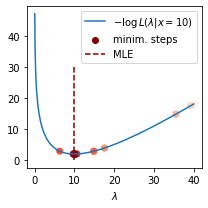

In [67]:
import scipy.optimize
import scipy.stats as sps

steps  = []
def logpdf(p):
    steps.append(p) #just to record intermediates
    return -sps.poisson.logpmf(10,p)

scipy.optimize.minimize(logpdf, x0=40, method = 'SLSQP')

parvals = np.linspace(0,40,1001)
nll = -sps.poisson.logpmf(10,parvals)
plt.plot(parvals,nll, label = r'$-\mathrm{log}\,L(\lambda|x = 10)$')
plt.scatter(10,-sps.poisson.logpmf(10,10))
plt.scatter(steps,-sps.poisson.logpmf(10,steps), c = np.linspace(0,1,len(steps)), cmap  = 'Reds')
plt.scatter(steps[-1],-sps.poisson.logpmf(10,steps[-1]), c = 'maroon', label = 'minim. steps')
plt.vlines(steps[-1],0,30, colors  = 'maroon', linestyles='dashed', label  = 'MLE')
plt.legend()
plt.xlabel(r'$\lambda$')
plt.gcf().set_size_inches(3,3)
plt.gcf().set_tight_layout(True)
plt.gcf().savefig('poisson_nll_with_minimize.png', dpi = 600)


In [69]:
def logpdf(p):
    return -sps.poisson.logpmf(10,p)

scipy.optimize.minimize(logpdf, x0=20, method = 'SLSQP')


     fun: array([2.07856165])
     jac: array([2.36034393e-05])
 message: 'Optimization terminated successfully'
    nfev: 18
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([10.00023639])

In [ ]:
parvals = np.linspace(0,40,1001)
nll = -sps.poisson.logpmf(10,parvals)
plt.plot(parvals,nll, label = r'$-\mathrm{log}\,L(\lambda|x = 10)$')
plt.legend()
plt.xlabel(r'$\lambda$')
plt.gcf().set_size_inches(3,3)
plt.gcf().set_tight_layout(True)
plt.gcf().savefig('poisson_nll.png', dpi = 600)

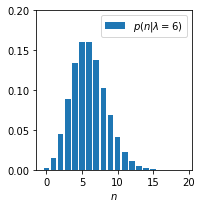

In [34]:
observations = np.arange(0,20)
probs = sps.poisson.pmf(observations,6)
plt.bar(observations,probs, label = r'$p(n|\lambda = 6)$')
plt.legend()
plt.xlabel(r'$n$')
plt.ylim(0,0.2)
plt.gcf().set_size_inches(3,3)
plt.gcf().set_tight_layout(True)
plt.gcf().savefig('poisson_probs.png', dpi = 600)